In [86]:
import pandas as pd #Use esta libreria para poder importar en formato de columnas los archivos
a =pd.read_csv('MEDIO.txt',delim_whitespace=True) #De esta forma podemos importar nuestro archivo txt (Asegurense que solo tengan datos flotantes, eliminen el encabezado de sus archivos)
x=a.iloc[:,3] #En la lista x se almacenan los valores de la primer columna (Tiempo)
y=a.iloc[:,4] ##En la lista y se almacenan los valores de la segunda columna (Señal EKG)


In [87]:
a=list(x) #La columna de tiempo la converti en una lista
w=a[:] #Dado que nuestro tiempo de muestreo fue de 30 s, el programa tarda mucho. Con este metodo solo tomo en cuenta los primeros 2000 datos (es decir, los primeros 10 seg)
#print(w)

In [88]:
m=list(y) #Para esta columna de ECG hice exactamente lo mismo que para la columna de arriba (tiempo)
t=m[:]
#print(t)

In [89]:
y=[]
x=[]
for i in range(300,len(t)-1):
    y.append(t[i])
    x.append(w[i])

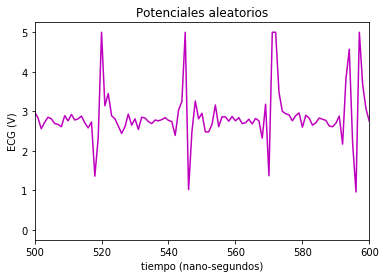

In [90]:
import matplotlib.pyplot as plt #Importo la libreria para graficar
#from numpy import *
#from pylab import *
%matplotlib inline
plt.plot(x,y,'m') #Al eje X le asigno la lista de tiempo, y al eje Y la lista del valor del potencial
plt.title("Potenciales aleatorios")   # Establece el título del gráfico
plt.xlabel("tiempo (nano-segundos)")   # Establece el título del eje x 
plt.ylabel("ECG (V)")
plt.xlim(500,600)
plt.show()

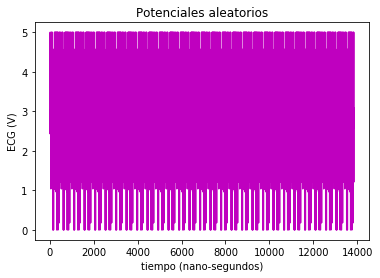

In [91]:
from numpy import *
from pylab import *


phi=[]
#tiempo=[]
for i in range (1,30):
    for n in range(0,len(x)-1):
        phi.append(y[n])
tiempo=linspace(1,len(phi),len(phi))
plt.plot(tiempo,phi,'m') #Al eje X le asigno la lista de tiempo, y al eje Y la lista del valor del potencial
plt.title("Potenciales aleatorios")   # Establece el título del gráfico
plt.xlabel("tiempo (nano-segundos)")   # Establece el título del eje x 
plt.ylabel("ECG (V)")
#plt.xlim(300,500)
plt.show()

In [71]:
def fft_w(x,ffx):
    n = len(ffx)
    delta_x = x[1] - x[0]
    omega = linspace(0,1.0/delta_x, n/2 +1)
    omega = omega*pi
    T = np.fft.rfft(ffx)/n
    espectro = abs(T)
    return omega , espectro

In [45]:
omega, espectro=fft_w(tiempo,phi)
len(omega)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


18401

Text(0, 0.5, 'Densidad de frecuencia')

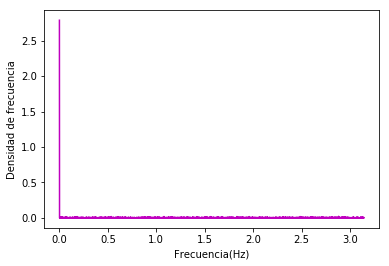

In [46]:
plt.plot(omega,espectro,"m")
plt.xlabel("Frecuencia(Hz)")   # Establece el título del eje x 
plt.ylabel("Densidad de frecuencia")

In [47]:
frecuencia=[]
cof=[]
for i in range(1,len(espectro)):
    frecuencia.append(omega[i])
    cof.append(espectro[i])
#print(espectro)

In [48]:
print(cof[0], cof[len(espectro)-2], len(cof), len(espectro))

8.293060776401968e-18 1.3920767251606857e-18 18400 18401


Text(0, 0.5, 'Densidad de frecuencia')

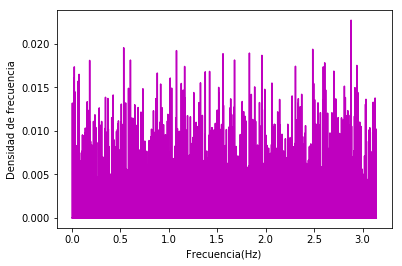

In [49]:
plt.plot(frecuencia,cof,"m")
plt.xlabel("Frecuencia(Hz)")   # Establece el título del eje x 
plt.ylabel("Densidad de frecuencia")
#ylim(0,0.05)

Text(0, 0.5, 'Densidad de frecuencia')

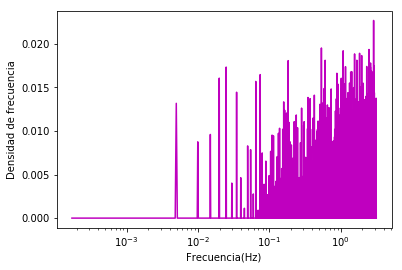

In [50]:
plt.semilogx(frecuencia,cof,"m")
plt.xlabel("Frecuencia(Hz)")   # Establece el título del eje x 
plt.ylabel("Densidad de frecuencia")

In [51]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

In [52]:
def showHarmonics(period, N):
    """Calculate the Fourier Series up to N harmonics, and show the reconstructed signal."""
    F = fourierSeries(period, N+1)
    plt.subplot(231); plt.stem(F[:,0])
    plt.subplot(234); plt.stem(F[:,1])
    print("cos",F[:,0])
    print("sin",F[:,1])
    plt.subplot(132)
    T = len(period)
    t = np.arange(T)/T
    result = 0
    for n, (an, bn) in enumerate(F):
        if n == 0:
            an = an/2
        cos_part = an*np.cos(2*np.pi*n*t)
        sin_part = bn*np.sin(2*np.pi*n*t)
        plt.plot(t, cos_part)
        plt.plot(t, sin_part)
        result = result + cos_part + sin_part
    plt.subplot(133)
    t2 = np.arange(2*T)/T
    plt.plot(t2, np.tile(period, 2))
    plt.plot(t2, np.tile(result, 2))
    return F

cos [ 5.61510460e+00 -1.96831922e-16 -3.93663844e-16 -2.29637243e-16
 -2.95247883e-16]
sin [ 0.00000000e+00  0.00000000e+00 -1.31221281e-16  9.84159611e-17
 -6.56106407e-17]


array([[ 5.61510460e+00,  0.00000000e+00],
       [-1.96831922e-16,  0.00000000e+00],
       [-3.93663844e-16, -1.31221281e-16],
       [-2.29637243e-16,  9.84159611e-17],
       [-2.95247883e-16, -6.56106407e-17]])

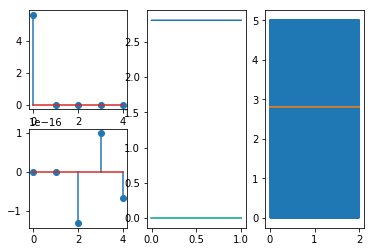

In [92]:
showHarmonics(phi, 3)

In [33]:
b=0
for i in range(0,len(cof)):
    if b<cof[i]:
        b=cof[i]
        c=frecuencia[i]
print("c=",c,"b=",b)
if b== 0.06481136075204359 and c== 0.9008150978035251:
    print("Meñique")
elif b== 0.022695656366861147 and c==2.881728304743942:
    print("Pulgar")
elif b==0.019301375436184737 and c==3.0283284023218497:
    print("Índice")
elif b==0.09009357323302815 and c==1.7745397834084604:
    print("Medio")
elif b==0.08364660467441601 and c==0.29844434858803437:
    print("Anular")

c= 1.7745397834084604 b= 0.09009357323302815
Medio
